In [1]:
## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [3]:
# Reading the Data
LeadScore= pd.read_csv("C:/Users/vinur/Personal/Upgrad/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")
LeadScore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
LeadScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
LeadScore.shape

(9240, 37)

In [6]:
LeadScore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [7]:
LeadScore.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
LeadScore.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Drop the columns with unique values as they have no effect on the analysis. Prospect ID and Lead Number are the two variables which have unique values, indicates they are the id numbers of the people contacted. Therefore these columns can be removed.
LeadScore.drop(['Prospect ID','Lead Number'],1, inplace= True)
LeadScore

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [10]:
# Replace all the 'Select'  values with NaN
LeadScore= LeadScore.replace('Select',np.nan)
LeadScore

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [11]:
# Check the percentage of null values in all the columns.
round(100*(LeadScore.isnull().sum()/len(LeadScore.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
# Drop off the columns with more than 40% null values.
Ncols= LeadScore.columns


for i in Ncols:
    if((100*(LeadScore[i].isnull().sum()/len(LeadScore.index)) >= 40)):
        LeadScore.drop(i, 1, inplace= True)

In [13]:
#Checking null value percentage of the remaining columns.
round(100*(LeadScore.isnull().sum()/len(LeadScore.index)),2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## EDA

### Categorical Columns Analysis

In [15]:
###Calculate the value counts of 'Country' column

LeadScore['Country'].value_counts(dropna= False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
Kuwait                     4
South Africa               4
Canada                     4
Sweden                     3
Asia/Pacific Region        2
Philippines                2
Belgium                    2
Uganda                     2
China                      2
Italy                      2
Ghana                      2
Netherlands                2
Bangladesh                 2
Indonesia                  1
Vietnam                    1
Kenya                      1
Denmark                    1
Sri Lanka                  1
Russia        

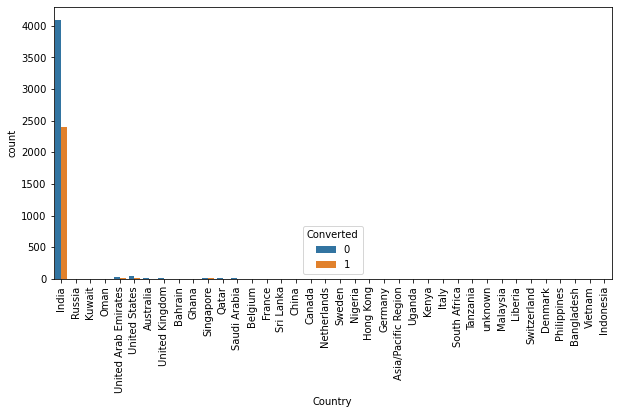

In [16]:
## Visualizing spread of Country column 
plt.figure(figsize= (10,5))
Con = sns.countplot(LeadScore.Country, hue= LeadScore.Converted)
Con.set_xticklabels(Con.get_xticklabels(), rotation= 90)
plt.show()



In [17]:
## The Value counts of India are highest so we can now replace all the missing values in the country column with "India"
LeadScore['Country']= LeadScore['Country'].replace(np.nan, 'India')

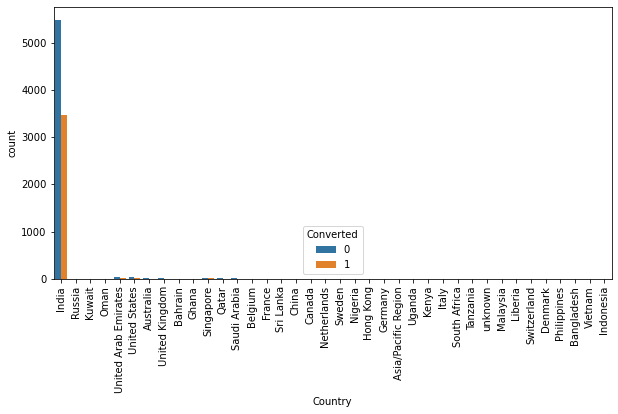

In [18]:
## Visualizing the spread of "Country" column after replacing the NaN values with 'India'

plt.figure(figsize= (10,5))
Con= sns.countplot(LeadScore.Country, hue= LeadScore.Converted)
Con.set_xticklabels(Con.get_xticklabels(),rotation = 90)
plt.show()

In [19]:
### Calculate the value counts of "City" column

LeadScore["City"].value_counts(dropna= False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

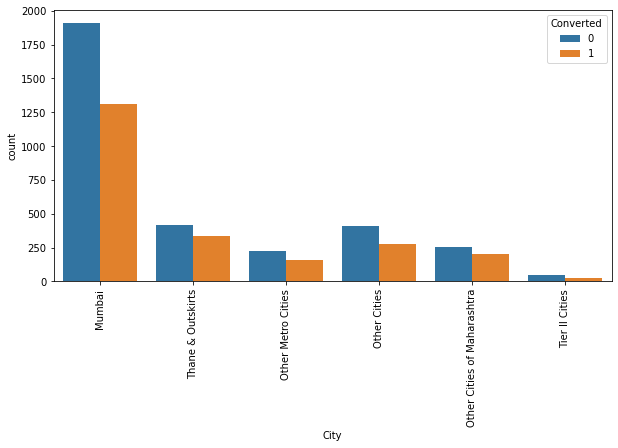

In [20]:
## Visualizing spread of 'City' column

plt.figure(figsize= (10,5))
Cit= sns.countplot(LeadScore.City, hue= LeadScore.Converted)
Cit.set_xticklabels(Cit.get_xticklabels(), rotation= 90)
plt.show()

In [21]:
## The value counts of 'Mumbai' are highest in the 'City' column, so lets replace all the missing values with 'Mumbai'

LeadScore['City']= LeadScore['City'].replace(np.nan, 'Mumbai' )

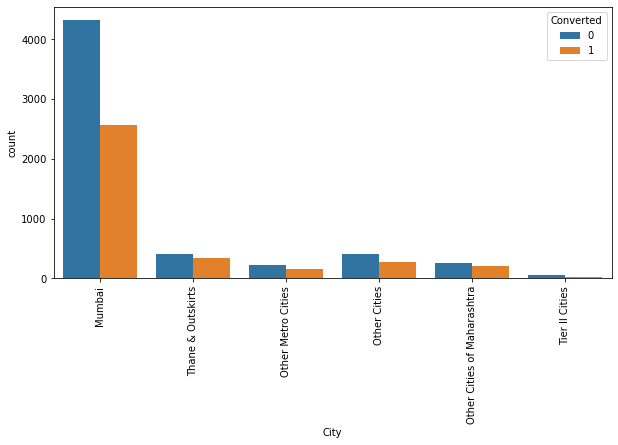

In [22]:
## Visualizing the spread of "City" column after replacing the NaN values with 'Mumbai'

plt.figure(figsize=(10,5))
Cit= sns.countplot(LeadScore.City, hue= LeadScore.Converted)
Cit.set_xticklabels(Cit.get_xticklabels(), rotation=90)
plt.show()

In [23]:
## Checking value counts of 'Specialization' column.

LeadScore["Specialization"].value_counts(dropna= False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
## Missing values in the 'Specialization' might be there as the students were not assigned any Specialization yet.
## So, we can't replace them with the specialization with the most value counts.
# We can therefore replace all the 'NaN' values with 'Not Assigned'

LeadScore['Specialization']= LeadScore['Specialization'].replace(np.nan, 'Not Assigned')

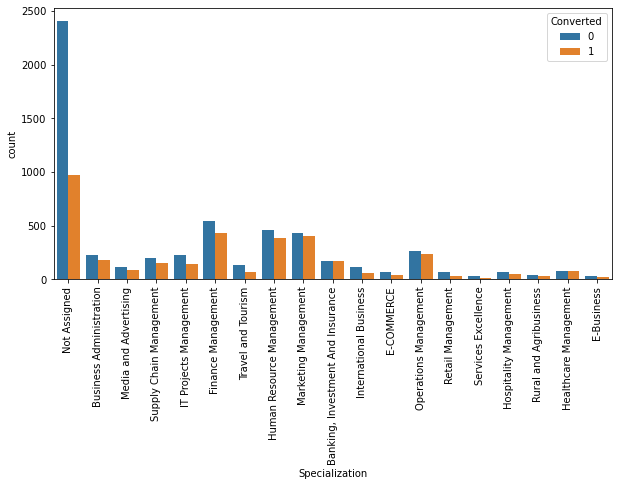

In [25]:
## Visualizing the spread of the 'Specialization' column

plt.figure(figsize= (10,5))
Spec= sns.countplot(LeadScore.Specialization, hue= LeadScore.Converted)
Spec.set_xticklabels(Spec.get_xticklabels(), rotation= 90)
plt.show()

In [26]:
## Joining together all the management Specializations as they have similar patterns.

LeadScore['Specialization']= LeadScore['Specialization'].replace(['Supply Chain Management','IT Projects Management','Finance Management','Human Resource Management','Marketing Management','Operations Management','Retail Management','Hospitality Management','Healthcare Management'], 'Management Specializations')

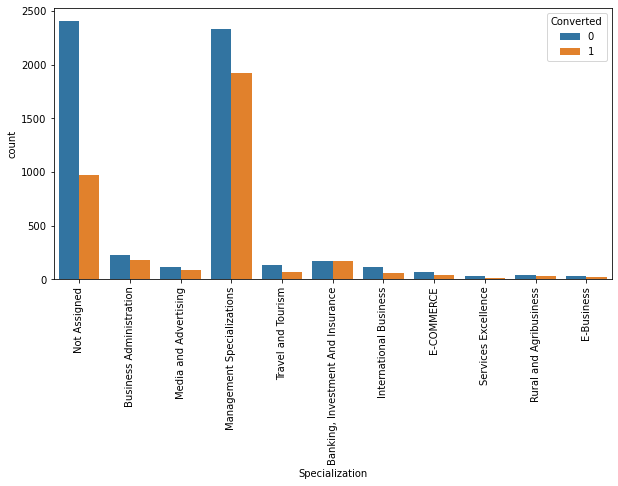

In [27]:
## Visualizing the spread of 'Specialization' column after replacing.

plt.figure(figsize= (10,5))
Spec= sns.countplot(LeadScore.Specialization, hue= LeadScore.Converted)
Spec.set_xticklabels(Spec.get_xticklabels(), rotation= 90)
plt.show()

In [28]:
## Calculate the value counts of "Tags" column

LeadScore["Tags"].value_counts(dropna= False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [29]:
## Replacing the Nan values with 'Not Mentioned'

LeadScore['Tags']= LeadScore['Tags'].replace(np.nan, "Not Mentioned")

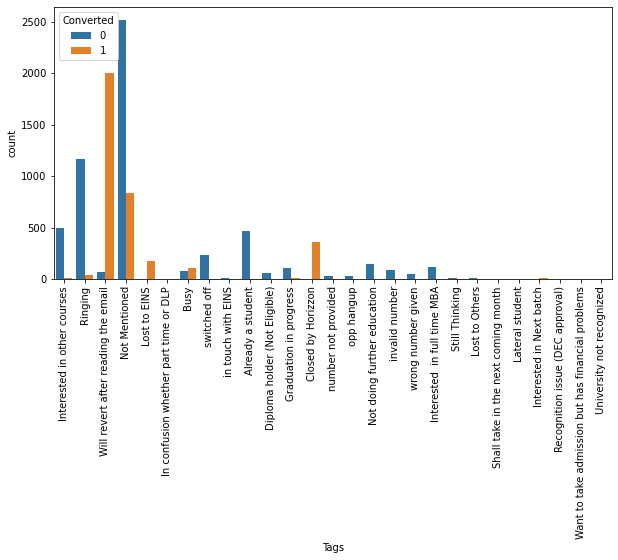

In [30]:
## Visualizing the spread of "Tags" column

plt.figure(figsize= (10,5))
Tag= sns.countplot(LeadScore.Tags, hue= LeadScore.Converted)
Tag.set_xticklabels(Tag.get_xticklabels(), rotation= 90)
plt.show()

In [31]:
### Joining all the tags with less value counts into "Other Tags"

LeadScore["Tags"]= LeadScore["Tags"].replace(['In confusion whether part time or DLP','switched off','in touch with EINS','Already a student','Diploma holder(Not Eligible)','Graduation in progress','number not provided','opp hangup','Not doing further education','Invalid number','wrong number given','Interested in full time MBA','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue(DEC approval)','Want to take admission but has financial problems','University not recognized'],'Other Tags')
LeadScore["Tags"]= LeadScore["Tags"].replace(['Diploma holder(Not Eligible)','invalid number','Interested in full time MBA','Recognition issue (DEC approval)'],'Other Tags')

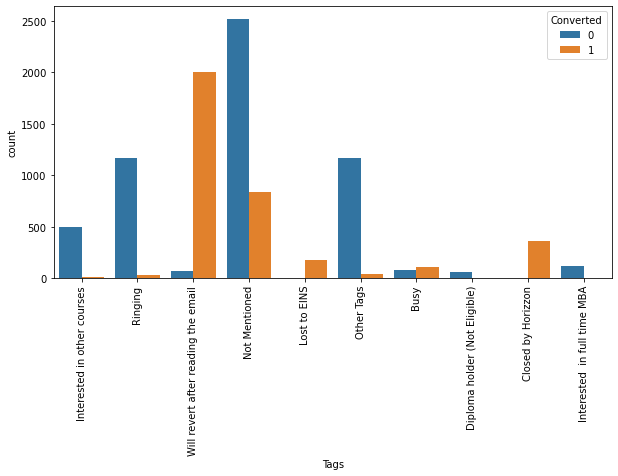

In [32]:
## Visualizing the spread of "Tags" column after replacing.

plt.figure(figsize=(10,5))
Tag= sns.countplot(LeadScore.Tags, hue= LeadScore.Converted)
Tag.set_xticklabels(Tag.get_xticklabels(),rotation= 90)
plt.show()

In [33]:
## Calculating the value counts of "What is your current occupation" column

LeadScore["What is your current occupation"].value_counts(dropna= False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
# As we have "Unemployed" with most value counts we can replace NaN with "Unemployed"

LeadScore["What is your current occupation"]= LeadScore["What is your current occupation"].replace(np.nan, 'Unemployed')

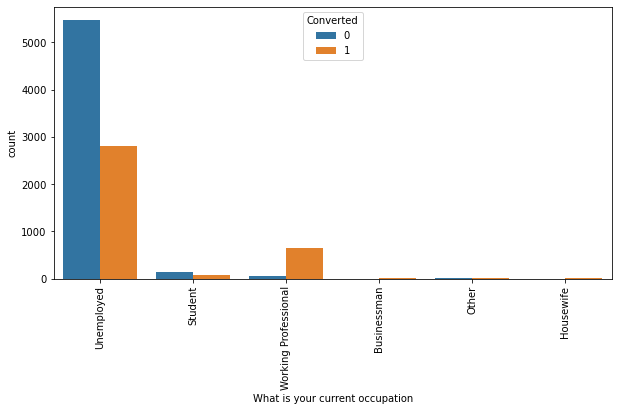

In [35]:
## Visualizing the spread of "What is your current occupation" after replacing NaN values

plt.figure(figsize=(10,5))
Occ= sns.countplot(LeadScore['What is your current occupation'], hue= LeadScore.Converted)
Occ.set_xticklabels(Occ.get_xticklabels(), rotation = 90)
plt.show()

In [36]:
## Calculate the value counts of "What matters most to you in choosing a course"

LeadScore["What matters most to you in choosing a course"].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [37]:
## As 'Better Career Prospects' has the most value counts, we can replace NaN values with "Better Career Prospects"

LeadScore["What matters most to you in choosing a course"]= LeadScore["What matters most to you in choosing a course"].replace(np.nan,'Better Career Prospects')

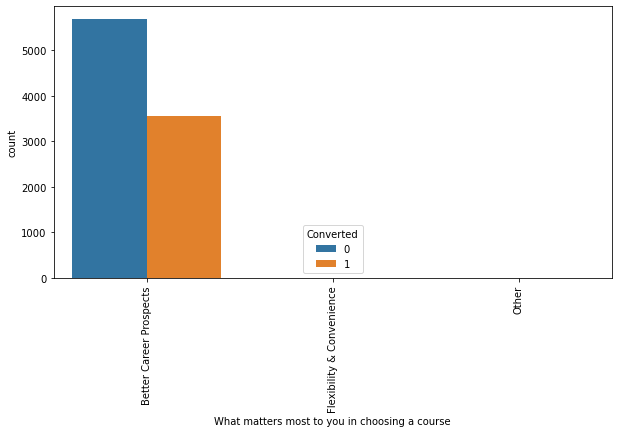

In [38]:
## Visualizing the spread of "What matters most to you in choosing a course"

plt.figure(figsize= (10,5))
CC= sns.countplot(LeadScore['What matters most to you in choosing a course'], hue= LeadScore.Converted)
CC.set_xticklabels(CC.get_xticklabels(), rotation= 90)
plt.show()

In [39]:
## Checking the missing values percentage

round(100*(LeadScore.isnull().sum()/len(LeadScore.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [40]:
## Calculating the value counts of "Lead Source" column

LeadScore["Lead Source"].value_counts(dropna= False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
testone                 1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [41]:
LeadScore["Lead Source"]= LeadScore["Lead Source"].replace('google','Google')
LeadScore["Lead Source"]= LeadScore["Lead Source"].replace('Facebook','Social Media')
LeadScore["Lead Source"]= LeadScore["Lead Source"].replace(np.nan, 'Others')
LeadScore["Lead Source"]= LeadScore["Lead Source"].replace(['bing','Click2call','Live Chat','Press_Release','welearnblog_Home','WeLearn','Pay per Click Ads','NC_EDM','testone','blog','youtubechannel'], 'Others')

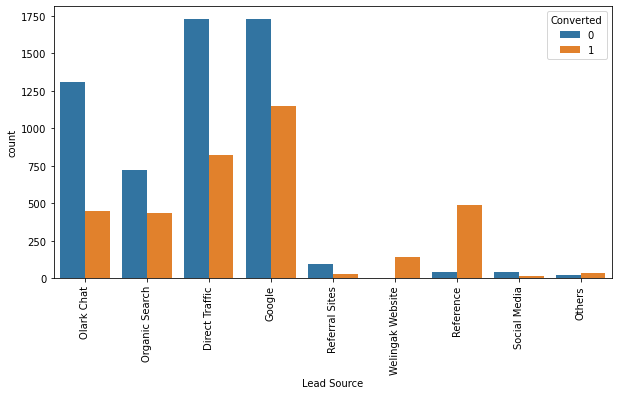

In [42]:
## Visualizing spread of "Lead Source" column

plt.figure(figsize=(10,5))
Srce= sns.countplot(LeadScore['Lead Source'], hue= LeadScore.Converted)
Srce.set_xticklabels(Srce.get_xticklabels(), rotation= 90)
plt.show()

In [43]:
## Calculate the value counts of "Last Activity" column

LeadScore["Last Activity"].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [44]:
LeadScore["Last Activity"]= LeadScore["Last Activity"].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')
LeadScore["Last Activity"]= LeadScore["Last Activity"].replace(np.nan,'Others')

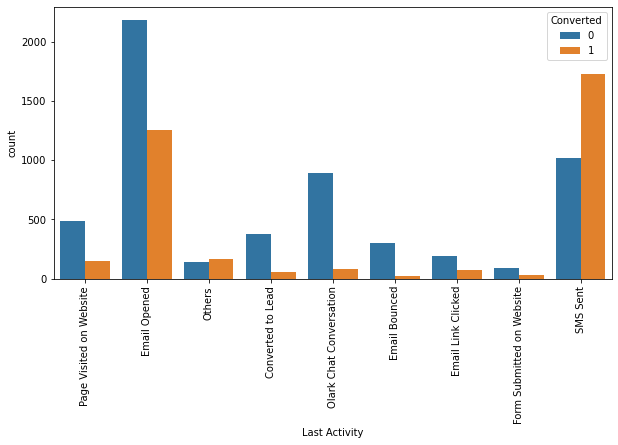

In [45]:
## Visualizing the spread of "Last Activity" column after replacement

plt.figure(figsize=(10,5))
Act= sns.countplot(LeadScore['Last Activity'], hue= LeadScore.Converted)
Act.set_xticklabels(Act.get_xticklabels(), rotation= 90)
plt.show()

In [46]:
## We can now drop the rows with NaN values in "TotalVisits" and "Page Views Per Visit"

LeadScore= LeadScore.dropna()

In [47]:
## Checking the percentage of null values in all the columns

round(100*(LeadScore.isnull().sum()/len(LeadScore.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [48]:
## Calculate the value counts of Lead Origin column

LeadScore['Lead Origin'].value_counts(dropna= False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

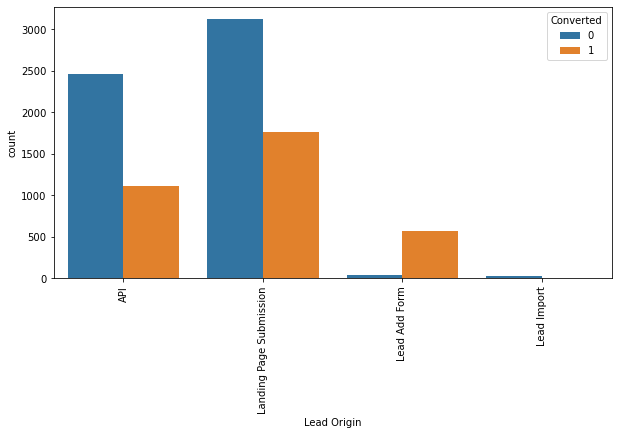

In [49]:
## Visualizing the count of "Lead Origin" column based on Converted Value.

plt.figure(figsize= (10,5))
LO= sns.countplot(LeadScore['Lead Origin'], hue= LeadScore.Converted)
LO.set_xticklabels(LO.get_xticklabels(),rotation= 90)
plt.show()

In [50]:
## Calculating the value counts of the "Do Not Email" column

LeadScore['Do Not Email'].value_counts(dropna= False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [51]:
## Calculating the value counts of the "Do Not Call"

LeadScore['Do Not Call'].value_counts(dropna= False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

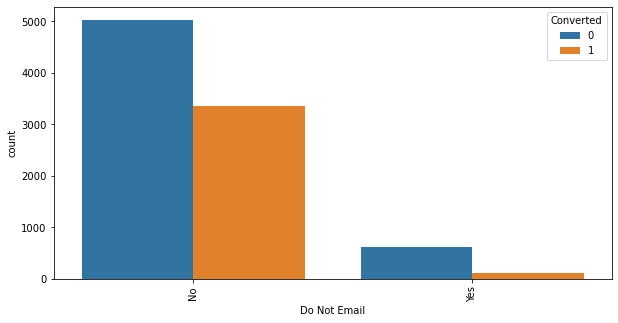

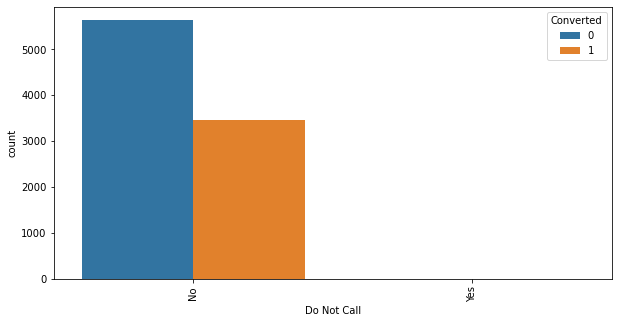

In [52]:
## Visualizing the count of "Do Not Email" and "Do Not Call" based on converted value

plt.figure(figsize= (10,5))
DNE= sns.countplot(LeadScore['Do Not Email'], hue= LeadScore.Converted)
DNE.set_xticklabels(DNE.get_xticklabels(), rotation= 90)
plt.show()

plt.figure(figsize= (10,5))
DNC= sns.countplot(LeadScore['Do Not Call'], hue= LeadScore.Converted)
DNC.set_xticklabels(DNC.get_xticklabels(), rotation= 90)
plt.show()

In [53]:
LeadScore['Search'].value_counts(dropna= False)

No     9089
Yes      14
Name: Search, dtype: int64

In [54]:
LeadScore['Magazine'].value_counts(dropna= False)

No    9103
Name: Magazine, dtype: int64

In [55]:
LeadScore['Newspaper Article'].value_counts(dropna= False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [56]:
LeadScore['X Education Forums'].value_counts(dropna= False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [57]:
LeadScore['Newspaper'].value_counts(dropna= False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [58]:
LeadScore['Digital Advertisement'].value_counts(dropna= False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [59]:
LeadScore['Through Recommendations'].value_counts(dropna= False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [60]:
LeadScore['Receive More Updates About Our Courses'].value_counts(dropna= False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [61]:
LeadScore['Update me on Supply Chain Content'].value_counts(dropna= False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [62]:
LeadScore['Get updates on DM Content'].value_counts(dropna= False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [63]:
LeadScore['I agree to pay the amount through cheque'].value_counts(dropna= False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [64]:
LeadScore['A free copy of Mastering The Interview'].value_counts(dropna= False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [65]:
LeadScore['Last Notable Activity'].value_counts(dropna= False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [66]:
LeadScore['Last Notable Activity']= LeadScore['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','View in browser link Clicked','Form Submitted on Website','Resubscribed to emails','Email Received'],'Others')

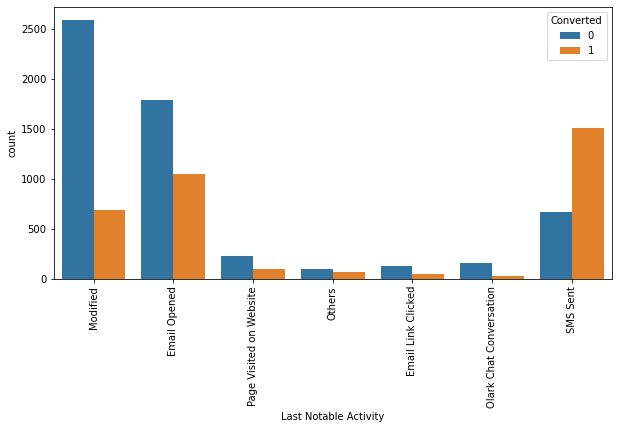

In [67]:
## Visualizing the count of 'Last Notable Activity' based on Converted.

plt.figure(figsize=(10,5))
NA= sns.countplot(LeadScore['Last Notable Activity'], hue= LeadScore.Converted)
NA.set_xticklabels(NA.get_xticklabels(), rotation= 90)
plt.show()

In [68]:
LeadScore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [69]:
## From this Data lets select the columns to be dropped. The columns which have imbalanced value counts of variables can be dropped as they are no longer useful for analysis.
Drop_cols= ['Country','What matters most to you in choosing a course','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
LeadScore.drop(Drop_cols,inplace= True, axis=1)


In [70]:
LeadScore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### Visualization of Numerical Attributes

In [72]:
# Percentage of data that has converted values equal to 1

ConVal= (sum(LeadScore['Converted'])/len(LeadScore['Converted'].index))*100
ConVal

38.02043282434362

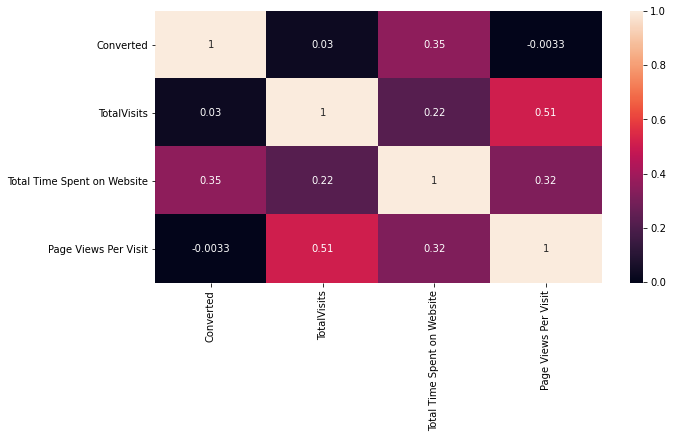

In [73]:
# To Check the correlation among the numerical variables

plt.figure(figsize= (10,5))
sns.heatmap(LeadScore.corr(),annot=True)
plt.show()

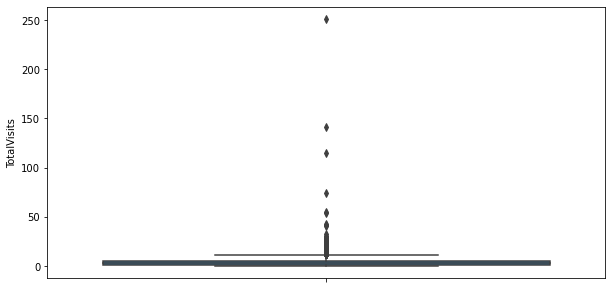

In [74]:
## Visualizing the spread of "TotalVisits" 

plt.figure(figsize=(10,5))
sns.boxplot(y= LeadScore['TotalVisits'])
plt.show()

In [75]:
LeadScore['TotalVisits'].describe(percentiles= [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

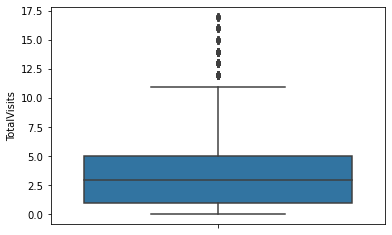

In [76]:
## Treatment of Outliers
## Remove outliers at 0.99 and 0.01

O1= LeadScore.TotalVisits.quantile(0.99)
LeadScore= LeadScore[(LeadScore.TotalVisits <= O1)]
O3= LeadScore.TotalVisits.quantile(0.01)
LeadScore= LeadScore[(LeadScore.TotalVisits >= O3)]

sns.boxplot(y= LeadScore['TotalVisits'])
plt.show()


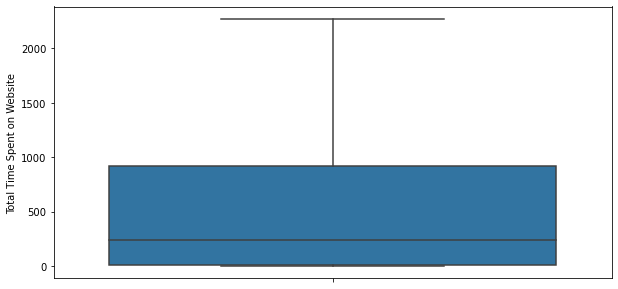

In [77]:
## Visualizing the spread of "Total Time Spent on Website" 

plt.figure(figsize= (10,5))
sns.boxplot(y= LeadScore['Total Time Spent on Website'])
plt.show()

In [78]:
LeadScore['Total Time Spent on Website'].describe(percentiles= [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [79]:
## As we dont see any predictable outliers in this Variable,we needn't perform the Outlier Treatment.

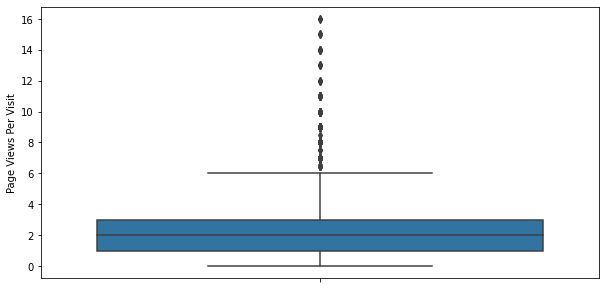

In [80]:
## Visualizing the spread of "Page Views Per Visit"

plt.figure(figsize= (10,5))
sns.boxplot(y= LeadScore['Page Views Per Visit'])
plt.show()

In [81]:
LeadScore['Page Views Per Visit'].describe(percentiles= [0.05, 0.25,0.50, 0.75, 0.90, 0.95, 0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

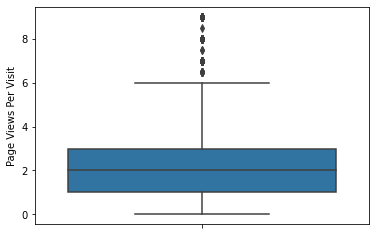

In [82]:
## Treatment of Outliers
## Removal of outliers at 0.01 and 0.99

O1= LeadScore['Page Views Per Visit'].quantile(0.99)
LeadScore= LeadScore[(LeadScore['Page Views Per Visit'] <= O1)]
O3= LeadScore['Page Views Per Visit'].quantile(0.01)
LeadScore= LeadScore[(LeadScore['Page Views Per Visit'] >= O3)]

sns.boxplot(y= LeadScore['Page Views Per Visit'])
plt.show()


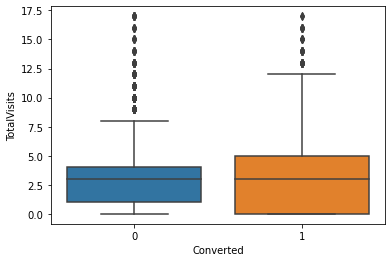

In [83]:
## Visualizing the spread of "TotalVisits" based on Converted variable

sns.boxplot(y= 'TotalVisits', x= 'Converted', data= LeadScore)
plt.show()

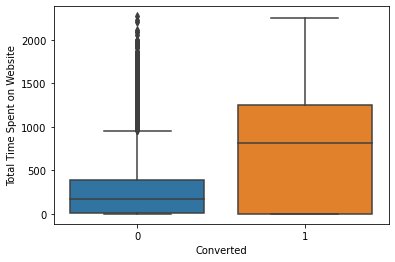

In [84]:
## Visualizing the spread of "Total Time Spent on Website" based on converted variable

sns.boxplot(y= LeadScore['Total Time Spent on Website'], x= LeadScore.Converted)
plt.show()

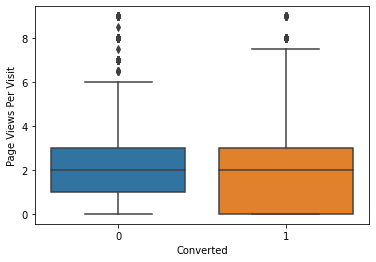

In [85]:
## Visualizing the spread of "Page Views Per Visit" based on converted variable

sns.boxplot(y= LeadScore['Page Views Per Visit'], x= LeadScore.Converted)
plt.show()

In [86]:
round(100*(LeadScore.isnull().sum()/len(LeadScore.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

###  Creating Dummy Variables 

In [88]:
## Finding the categorical columns from the final columns list

CatCols= LeadScore.select_dtypes(include= ['object']).columns
CatCols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [89]:
## Defining and Applying the map function to variables

variables= ['Do Not Email','A free copy of Mastering The Interview']

def variable_map(v):
    return v.map({"Yes": 1,"No": 0})
LeadScore[variables]= LeadScore[variables].apply(variable_map)

In [90]:
## Create dummy variables using 'get_dummies'
## Adding the results to the master dataframe

dummy_var= pd.get_dummies(LeadScore[['Lead Origin','What is your current occupation','City']], drop_first= True)
LeadScore= pd.concat([LeadScore,dummy_var],1)

In [91]:
dummy_var= pd.get_dummies(LeadScore['Lead Source'], prefix= 'Lead Source')
dummy_var= dummy_var.drop(['Lead Source_Others'],1)
LeadScore= pd.concat([LeadScore, dummy_var], axis=1)

In [92]:
dummy_var= pd.get_dummies(LeadScore['Last Activity'], prefix= 'Last Activity')
dummy_var= dummy_var.drop(['Last Activity_Others'],1)
LeadScore= pd.concat([LeadScore, dummy_var], axis=1)

In [93]:
dummy_var= pd.get_dummies(LeadScore['Specialization'], prefix= 'Specialization')
dummy_var= dummy_var.drop(['Specialization_Not Assigned'],1)
LeadScore= pd.concat([LeadScore, dummy_var], axis=1)

In [94]:
dummy_var= pd.get_dummies(LeadScore['Tags'], prefix= 'Tags')
dummy_var= dummy_var.drop(['Tags_Not Mentioned'],1)
LeadScore= pd.concat([LeadScore, dummy_var], axis=1)

In [95]:
dummy_var= pd.get_dummies(LeadScore['Last Notable Activity'], prefix= 'Last Notable Activity')
dummy_var= dummy_var.drop(['Last Notable Activity_Others'],1)
LeadScore= pd.concat([LeadScore, dummy_var], axis=1)

In [96]:
LeadScore.drop(CatCols,1,inplace= True)

In [97]:
LeadScore.head(10)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,2.0,1640,2.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,2.0,71,2.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,4.0,58,4.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Test-Train Split

In [98]:
## Importing the necessary library

from sklearn.model_selection import train_test_split

In [99]:
X= LeadScore.drop(['Converted'],1)


In [100]:
## Putting the target variable in y

y= LeadScore['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [101]:
## Split the data into 70% and 30% for train and test.

X_train, X_test, y_train, y_test= train_test_split(X,y,train_size= 0.7, test_size= 0.3, random_state= 100)

In [102]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [103]:
X_train.shape

(6267, 57)

In [104]:
X_test.shape

(2686, 57)

In [105]:
## Scaling the three numerical columns
## import standardscaler

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


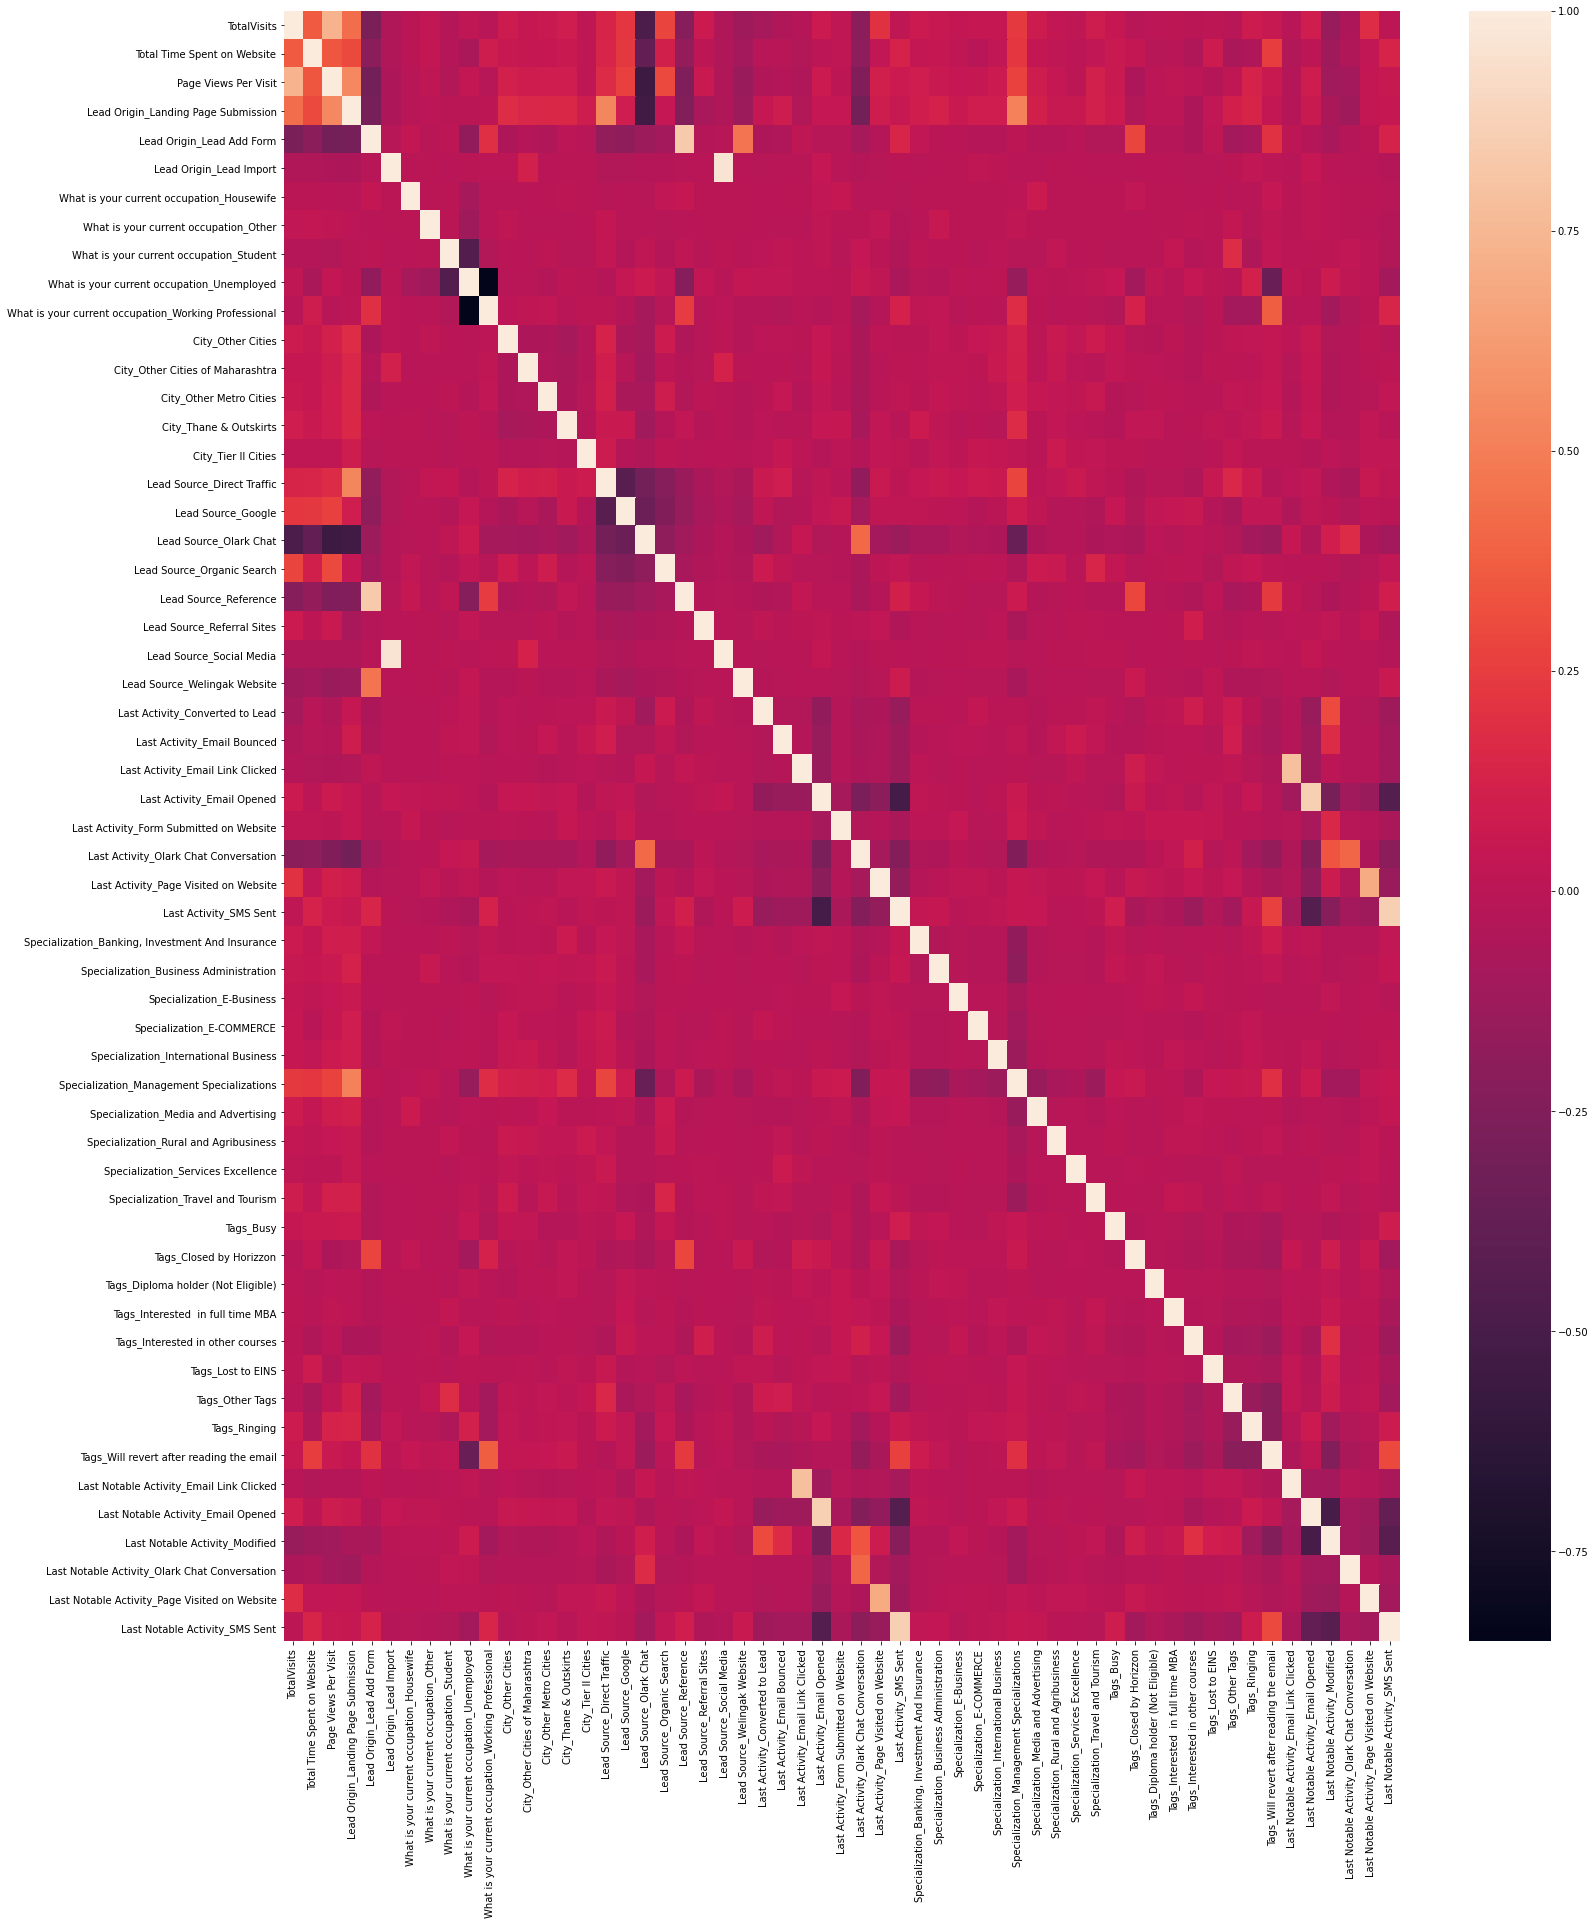

In [106]:
## Checking the correlation among the variables

plt.figure(figsize=(25,30))
sns.heatmap(X_train.corr())
plt.show()

## Model Building

In [107]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

import statsmodels.api as sm

from sklearn.feature_selection import RFE



In [108]:
## Running RFE with 15 variables as output

rfe= RFE(logreg,15)
rfe= rfe.fit(X_train, y_train)

In [109]:
## Features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('What is your current occupation_Housewife', False, 32),
 ('What is your current occupation_Other', False, 36),
 ('What is your current occupation_Student', False, 24),
 ('What is your current occupation_Unemployed', False, 23),
 ('What is your current occupation_Working Professional', False, 10),
 ('City_Other Cities', False, 25),
 ('City_Other Cities of Maharashtra', False, 39),
 ('City_Other Metro Cities', False, 42),
 ('City_Thane & Outskirts', False, 40),
 ('City_Tier II Cities', False, 30),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', False, 33),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead 

In [110]:
## Creating a list of RFE suported columns

col_RFE= X_train.columns[rfe.support_]
col_RFE

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [111]:
## Building the first model

X_train_sm= sm.add_constant(X_train[col_RFE])
logm1= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.1
Date:                Wed, 13 Oct 2021   Deviance:                       2552.2
Time:                        22:26:24   Pearson chi2:                 7.76e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3828      0.084    -16.510      0.000      -1.547      -1.219
Total Time Spent on Website                       0.8547      0.052     16.472      0.000       0.753       0.956
Lead Origin_Lead Add Form                         1.9028      0.448      4.249      0.000       1.025       2.781
Lead Source_Welingak Website                      3.8325      1.109      3.455      0.001       1.658       6.007
Last Activity_SMS Sent                            1.2055      0.221      5.455      0.000       0.772       1.639
Tags_Closed by Horizzon                           6.9064      1.018      6.784      0.000       4.911       8.902
Tags_Diploma holder (Not Eligible)               -2.4391      1.167     -2.091      0.037      -4.726      -0.152
Tags_Interested  in full time MBA                -1.6275      0.618     -2.635      0.008      -2.838      -0.417
Tags_Interested in other courses                 -2.1082      0.402     -5.244      0.000      -2.896      -1.320
Tags_Lost to EINS                                 5.5438      0.608      9.120      0.000       4.352       6.735
Tags_Other Tags                                  -2.6637      0.221    -12.051      0.000      -3.097      -2.231
Tags_Ringing                                     -3.6489      0.241    -15.110      0.000      -4.122      -3.176
Tags_Will revert after reading the email          4.3271      0.181     23.910      0.000       3.972       4.682
Last Notable Activity_Modified                   -1.2756      0.150     -8.507      0.000      -1.569      -0.982
Last Notable Activity_Olark Chat Conversation    -1.5193      0.481     -3.160      0.002      -2.462      -0.577
Last Notable Activity_SMS Sent                    1.0497      0.256      4.101      0.000       0.548       1.551
=================================================================================================================
"""

In [112]:
# Dropping the column with highest p-value

col_RFE= col_RFE.drop('Tags_Diploma holder (Not Eligible)',1)

In [113]:
## Building the second model

X_train_sm= sm.add_constant(X_train[col_RFE])
logm2= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1280.0
Date:                Wed, 13 Oct 2021   Deviance:                       2559.9
Time:                        22:26:24   Pearson chi2:                 7.81e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4012      0.084    -16.779      0.000      -1.565      -1.238
Total Time Spent on Website                       0.8523      0.052     16.459      0.000       0.751       0.954
Lead Origin_Lead Add Form                         1.9022      0.448      4.247      0.000       1.024       2.780
Lead Source_Welingak Website                      3.8477      1.109      3.469      0.001       1.673       6.022
Last Activity_SMS Sent                            1.2162      0.221      5.509      0.000       0.783       1.649
Tags_Closed by Horizzon                           6.9261      1.018      6.803      0.000       4.931       8.922
Tags_Interested  in full time MBA                -1.6073      0.617     -2.603      0.009      -2.818      -0.397
Tags_Interested in other courses                 -2.0896      0.402     -5.196      0.000      -2.878      -1.301
Tags_Lost to EINS                                 5.5627      0.608      9.152      0.000       4.371       6.754
Tags_Other Tags                                  -2.6506      0.221    -11.991      0.000      -3.084      -2.217
Tags_Ringing                                     -3.6379      0.241    -15.066      0.000      -4.111      -3.165
Tags_Will revert after reading the email          4.3452      0.181     24.015      0.000       3.991       4.700
Last Notable Activity_Modified                   -1.2785      0.150     -8.540      0.000      -1.572      -0.985
Last Notable Activity_Olark Chat Conversation    -1.5024      0.481     -3.122      0.002      -2.446      -0.559
Last Notable Activity_SMS Sent                    1.0496      0.256      4.104      0.000       0.548       1.551
=================================================================================================================
"""

In [114]:
## Creating a dataframe with all the feature variables with their VIF values

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['Features']= X_train[col_RFE].columns
vif['VIF']= [variance_inflation_factor(X_train[col_RFE].values,i) for i in range(X_train[col_RFE].shape[1])]
vif['VIF']= round(vif['VIF'])
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,Features,VIF
3,Last Activity_SMS Sent,6.0
13,Last Notable Activity_SMS Sent,6.0
1,Lead Origin_Lead Add Form,2.0
10,Tags_Will revert after reading the email,2.0
11,Last Notable Activity_Modified,2.0
0,Total Time Spent on Website,1.0
2,Lead Source_Welingak Website,1.0
4,Tags_Closed by Horizzon,1.0
5,Tags_Interested in full time MBA,1.0
6,Tags_Interested in other courses,1.0


 High VIF indicates higher correlation between the two variables , so we can drop the features with high VIF.

In [115]:
col_RFE= col_RFE.drop('Last Activity_SMS Sent',1)

In [116]:
## Building the third model

X_train_sm= sm.add_constant(X_train[col_RFE])
logm3= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1294.4
Date:                Wed, 13 Oct 2021   Deviance:                       2588.9
Time:                        22:26:25   Pearson chi2:                 7.98e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3948      0.083    -16.725      0.000      -1.558      -1.231
Total Time Spent on Website                       0.8654      0.051     16.805      0.000       0.764       0.966
Lead Origin_Lead Add Form                         1.9915      0.435      4.574      0.000       1.138       2.845
Lead Source_Welingak Website                      3.8760      1.105      3.506      0.000       1.709       6.042
Tags_Closed by Horizzon                           6.7284      1.015      6.629      0.000       4.739       8.718
Tags_Interested  in full time MBA                -1.6490      0.613     -2.691      0.007      -2.850      -0.448
Tags_Interested in other courses                 -2.2099      0.398     -5.547      0.000      -2.991      -1.429
Tags_Lost to EINS                                 5.4171      0.603      8.981      0.000       4.235       6.599
Tags_Other Tags                                  -2.6711      0.221    -12.090      0.000      -3.104      -2.238
Tags_Ringing                                     -3.6532      0.242    -15.092      0.000      -4.128      -3.179
Tags_Will revert after reading the email          4.2877      0.178     24.114      0.000       3.939       4.636
Last Notable Activity_Modified                   -0.9437      0.129     -7.314      0.000      -1.197      -0.691
Last Notable Activity_Olark Chat Conversation    -1.5035      0.479     -3.136      0.002      -2.443      -0.564
Last Notable Activity_SMS Sent                    2.2638      0.133     17.083      0.000       2.004       2.524
=================================================================================================================
"""

In [117]:
#Creating a dataframe with all the feature variables with their VIF values
vif= pd.DataFrame()
vif['Features']= X_train[col_RFE].columns
vif['VIF']= [variance_inflation_factor(X_train[col_RFE].values,i) for i in range(X_train[col_RFE].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.79
9,Tags_Will revert after reading the email,1.56
12,Last Notable Activity_SMS Sent,1.45
10,Last Notable Activity_Modified,1.40
2,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.21
3,Tags_Closed by Horizzon,1.20
7,Tags_Other Tags,1.14
5,Tags_Interested in other courses,1.12
8,Tags_Ringing,1.12


In [118]:
col_RFE= col_RFE.drop('Tags_Other Tags',1)

In [119]:
## Building the fourth model

X_train_sm= sm.add_constant(X_train[col_RFE])
logm4= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm4.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.1
Date:                Wed, 13 Oct 2021   Deviance:                       2832.2
Time:                        22:26:25   Pearson chi2:                 6.69e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7626      0.081    -21.869      0.000      -1.921      -1.605
Total Time Spent on Website                       0.8275      0.049     17.043      0.000       0.732       0.923
Lead Origin_Lead Add Form                         1.8313      0.413      4.429      0.000       1.021       2.642
Lead Source_Welingak Website                      4.3839      1.096      4.000      0.000       2.236       6.532
Tags_Closed by Horizzon                           7.0921      1.015      6.990      0.000       5.104       9.081
Tags_Interested  in full time MBA                -1.2656      0.610     -2.074      0.038      -2.461      -0.070
Tags_Interested in other courses                 -1.7957      0.391     -4.588      0.000      -2.563      -1.029
Tags_Lost to EINS                                 5.7506      0.602      9.555      0.000       4.571       6.930
Tags_Ringing                                     -3.0967      0.233    -13.278      0.000      -3.554      -2.640
Tags_Will revert after reading the email          4.6607      0.176     26.453      0.000       4.315       5.006
Last Notable Activity_Modified                   -0.9143      0.127     -7.225      0.000      -1.162      -0.666
Last Notable Activity_Olark Chat Conversation    -1.3309      0.479     -2.777      0.005      -2.270      -0.392
Last Notable Activity_SMS Sent                    2.0748      0.120     17.259      0.000       1.839       2.310
=================================================================================================================
"""

In [120]:
vif= pd.DataFrame()
vif['Features']= X_train[col_RFE].columns
vif['VIF']= [variance_inflation_factor(X_train[col_RFE].values,i) for i in range(X_train[col_RFE].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.79
8,Tags_Will revert after reading the email,1.55
11,Last Notable Activity_SMS Sent,1.41
2,Lead Source_Welingak Website,1.34
9,Last Notable Activity_Modified,1.26
0,Total Time Spent on Website,1.21
3,Tags_Closed by Horizzon,1.20
5,Tags_Interested in other courses,1.11
7,Tags_Ringing,1.11
6,Tags_Lost to EINS,1.05


In [121]:
col_RFE= col_RFE.drop('Tags_Interested  in full time MBA',1)

In [122]:
X_train_sm= sm.add_constant(X_train[col_RFE])
logm5= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1419.1
Date:                Wed, 13 Oct 2021   Deviance:                       2838.3
Time:                        22:26:25   Pearson chi2:                 6.74e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7830      0.080    -22.204      0.000      -1.940      -1.626
Total Time Spent on Website                       0.8232      0.048     17.000      0.000       0.728       0.918
Lead Origin_Lead Add Form                         1.8297      0.414      4.422      0.000       1.019       2.641
Lead Source_Welingak Website                      4.4023      1.096      4.016      0.000       2.254       6.551
Tags_Closed by Horizzon                           7.1182      1.015      7.016      0.000       5.130       9.107
Tags_Interested in other courses                 -1.7715      0.392     -4.524      0.000      -2.539      -1.004
Tags_Lost to EINS                                 5.7765      0.602      9.600      0.000       4.597       6.956
Tags_Ringing                                     -3.0891      0.233    -13.243      0.000      -3.546      -2.632
Tags_Will revert after reading the email          4.6828      0.176     26.589      0.000       4.338       5.028
Last Notable Activity_Modified                   -0.9224      0.126     -7.300      0.000      -1.170      -0.675
Last Notable Activity_Olark Chat Conversation    -1.3270      0.479     -2.772      0.006      -2.265      -0.389
Last Notable Activity_SMS Sent                    2.0939      0.120     17.444      0.000       1.859       2.329
=================================================================================================================
"""

In [123]:
vif= pd.DataFrame()
vif['Features']= X_train[col_RFE].columns
vif['VIF']= [variance_inflation_factor(X_train[col_RFE].values,i) for i in range(X_train[col_RFE].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.79
7,Tags_Will revert after reading the email,1.55
10,Last Notable Activity_SMS Sent,1.41
2,Lead Source_Welingak Website,1.34
8,Last Notable Activity_Modified,1.24
0,Total Time Spent on Website,1.21
3,Tags_Closed by Horizzon,1.20
6,Tags_Ringing,1.11
4,Tags_Interested in other courses,1.10
5,Tags_Lost to EINS,1.05


In [124]:
col_RFE= col_RFE.drop('Last Notable Activity_Olark Chat Conversation',1)

In [125]:
X_train_sm= sm.add_constant(X_train[col_RFE])
logm6= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.3
Date:                Wed, 13 Oct 2021   Deviance:                       2848.7
Time:                        22:26:25   Pearson chi2:                 6.79e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8399      0.079    -23.282      0.000      -1.995      -1.685
Total Time Spent on Website                  0.8246      0.048     17.105      0.000       0.730       0.919
Lead Origin_Lead Add Form                    1.8415      0.414      4.448      0.000       1.030       2.653
Lead Source_Welingak Website                 4.4259      1.096      4.038      0.000       2.277       6.574
Tags_Closed by Horizzon                      7.1290      1.014      7.028      0.000       5.141       9.117
Tags_Interested in other courses            -1.7744      0.392     -4.528      0.000      -2.542      -1.006
Tags_Lost to EINS                            5.7587      0.601      9.582      0.000       4.581       6.937
Tags_Ringing                                -3.0810      0.234    -13.189      0.000      -3.539      -2.623
Tags_Will revert after reading the email     4.7049      0.176     26.737      0.000       4.360       5.050
Last Notable Activity_Modified              -0.8694      0.126     -6.916      0.000      -1.116      -0.623
Last Notable Activity_SMS Sent               2.1488      0.119     18.006      0.000       1.915       2.383
============================================================================================================
"""

In [126]:
vif= pd.DataFrame()
vif['Features']= X_train[col_RFE].columns
vif['VIF']= [variance_inflation_factor(X_train[col_RFE].values,i) for i in range(X_train[col_RFE].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by= "VIF", ascending= False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.79
7,Tags_Will revert after reading the email,1.55
9,Last Notable Activity_SMS Sent,1.41
2,Lead Source_Welingak Website,1.34
8,Last Notable Activity_Modified,1.24
0,Total Time Spent on Website,1.20
3,Tags_Closed by Horizzon,1.20
6,Tags_Ringing,1.11
4,Tags_Interested in other courses,1.10
5,Tags_Lost to EINS,1.05


### Predictions, probability and Lead score of train data

In [127]:
y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

9196    0.223040
4696    0.057149
3274    0.445067
2164    0.009842
1667    0.980213
7024    0.071819
8018    0.071819
778     0.037459
6942    0.031417
4440    0.107797
dtype: float64

In [128]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22304043, 0.05714892, 0.44506656, 0.0098419 , 0.98021316,
       0.07181883, 0.07181883, 0.03745947, 0.03141698, 0.10779705])

In [129]:
y_train_pred_final= pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.223040,9196
1,0,0.057149,4696
2,0,0.445067,3274
3,0,0.009842,2164
4,1,0.980213,1667


In [130]:
y_train_pred_final['Predicted']= y_train_pred_final.Converted_prob.map(lambda x:1 if x> 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.223040,9196,0
1,0,0.057149,4696,0
2,0,0.445067,3274,0
3,0,0.009842,2164,0
4,1,0.980213,1667,1


## Model Evaluation

In [131]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [132]:
# Creating confusion matrix

ConfMat= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(ConfMat)

[[3732  150]
 [ 408 1977]]


In [133]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9109621828626137

In [134]:
# Substituting the value of True positive
TP= ConfMat[1,1]
# Substituting the value of True Negative
TN= ConfMat[0,0]
# Substituting the value of False positive
FP= ConfMat[0,1]
#Substituting the value of False Negative
FN= ConfMat[1,0]

In [135]:
# Calculate the Sensitivity of our model

TP/(TP+FN)

0.8289308176100629

In [136]:
# Calculate the Specificity of our model

TN/(TN+FP)

0.9613601236476044

## Plotting ROC Curve

In [137]:
def plot_roc(actual, prob):
    fpr, tpr, thresholds = metrics.roc_curve(actual, prob, drop_intermediate= False)
    auc_score= metrics.roc_auc_score(actual, prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, label= 'ROC curve(area= %0.2f)'% auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [138]:
fpr,tpr,thresholds= metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate= False)

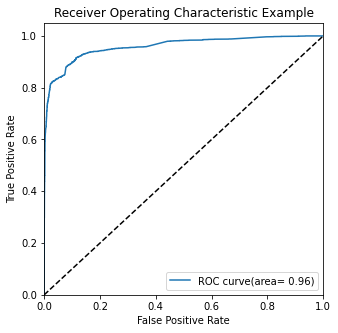

In [139]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The area under the curve is 0.96 indicates that our model is good predictive one.

In [140]:
# Determining Optimal cutoff point

numbers= [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x>i else 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.223040,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.057149,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.445067,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.009842,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.980213,1667,1,1,1,1,1,1,1,1,1,1,1


In [141]:
# Calculating Accuracy, Sensitivity, Specificity at various probability cutoffs

Prob_cutoff_df= pd.DataFrame(columns= ['probability','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    m1= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1= sum(sum(m1))
    accuracy= (m1[0,0]+m1[1,1])/total1
    speci= m1[0,0]/(m1[0,0]+m1[0,1])
    sensi= m1[1,1]/(m1[1,0]+m1[1,1])
    Prob_cutoff_df.loc[i]= [i, accuracy, sensi, speci]
    
print(Prob_cutoff_df)    

     probability  accuracy     sensi     speci
0.0          0.0  0.380565  1.000000  0.000000
0.1          0.1  0.829424  0.950524  0.755023
0.2          0.2  0.891495  0.921593  0.873004
0.3          0.3  0.899154  0.898113  0.899794
0.4          0.4  0.897718  0.850734  0.926584
0.5          0.5  0.910962  0.828931  0.961360
0.6          0.6  0.915111  0.815933  0.976043
0.7          0.7  0.911920  0.802935  0.978877
0.8          0.8  0.900431  0.763941  0.984286
0.9          0.9  0.874741  0.684277  0.991757


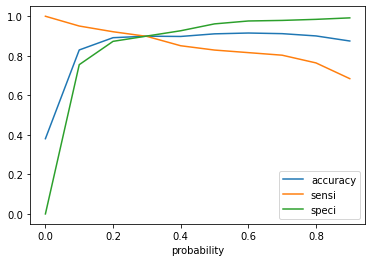

In [142]:
# Plotting the Accuracy, Sensitivity, Specificity at different probability values

Prob_cutoff_df.plot.line(x= 'probability',y= ['accuracy','sensi','speci'])
plt.show()

In [143]:
# From the above plot we can take 0.3 as the optimal probability cutoff

y_train_pred_final['final_pred']= y_train_pred_final.Converted_prob.map(lambda x: 1 if x> 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
0,1,0.223040,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.057149,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.445067,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.009842,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.980213,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [144]:
y_train_pred_final['Lead_score']= y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_pred','Lead_score']].head()

,Converted,Converted_prob,Prospect ID,final_pred,Lead_score
0,1,0.223040,9196,0,22
1,0,0.057149,4696,0,6
2,0,0.445067,3274,1,45
3,0,0.009842,2164,0,1
4,1,0.980213,1667,1,98


In [145]:
# Overall accuracy of the metrics

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_pred)

0.8991543003031753

In [146]:
ConfMat2= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_pred)
ConfMat2

array([[3493,  389],
       [ 243, 2142]], dtype=int64)

In [147]:
# Substituting the value of true positive
TP= ConfMat2[1,1]
# Substituting the value of true negative
TN= ConfMat2[0,0]
# Substituting the value of false positive
FP= ConfMat2[0,1]
# Substituting the value of false negative
FN= ConfMat2[1,0]

In [148]:
# calculating the sensitivity of the model
TP/(TP+FN)

0.8981132075471698

In [149]:
# Calculating the specificity of the model
TN/(TN+FP)

0.8997939206594538

In [150]:
from sklearn.metrics import precision_score, recall_score

In [151]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_pred)

0.8463058079810352

In [152]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_pred)

0.8981132075471698

In [153]:
from sklearn.metrics import precision_recall_curve

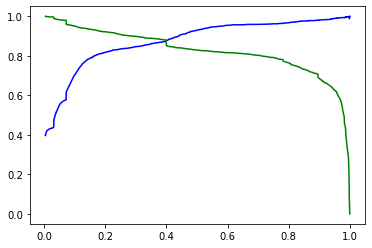

In [154]:
y_train_pred_final.Converted, y_train_pred_final.final_pred
p,r, thresholds= precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

## Prediction on test set

In [155]:
ncols= X_test.select_dtypes(include= ['float64','int64']).columns
X_test[ncols]= scaler.fit_transform(X_test[ncols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [156]:
X_test= X_test[col_RFE]
X_test

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
7681,-0.311318,0,0,0,0,0,1,0,0,1
984,-0.550262,0,0,0,0,0,0,0,1,0
8135,0.812462,0,0,0,0,0,0,0,0,1
6915,-0.628665,0,0,0,0,0,1,0,0,0
2712,-0.421456,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9029,-0.891876,0,0,0,0,0,0,0,1,0
1420,-0.150778,0,0,0,0,0,0,0,0,0
5996,-0.311318,0,0,1,0,0,0,0,1,0
4143,-0.738803,0,0,0,1,0,0,0,1,0


In [157]:
X_test_sm= sm.add_constant(X_test)

In [158]:
y_test_pred= res.predict(X_test_sm)
y_test_pred[:10]

7681    0.046143
984     0.040581
8135    0.726887
6915    0.004324
2712    0.925358
244     0.003643
4698    0.075758
8287    0.030926
6791    0.968025
8970    0.008806
dtype: float64

In [159]:
y_pred_df= pd.DataFrame(y_test_pred)
y_pred_df

,0
7681,0.046143
984,0.040581
8135,0.726887
6915,0.004324
2712,0.925358
...,...
9029,0.030926
1420,0.123014
5996,0.984677
4143,0.006103


In [160]:
y_test_df= pd.DataFrame(y_test)
y_test_df

,Converted
7681,0
984,0
8135,0
6915,0
2712,1
...,...
9029,1
1420,0
5996,1
4143,0


In [161]:
y_test_df['Prospect ID']= y_test_df.index
y_test_df.head()

,Converted,Prospect ID
7681,0,7681
984,0,984
8135,0,8135
6915,0,6915
2712,1,2712


In [162]:
## Appending both dataframes by removing their index

y_pred_df.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [163]:
y_pred_final= pd.concat([y_test_df, y_pred_df], axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.046143
1,0,984,0.040581
2,0,8135,0.726887
3,0,6915,0.004324
4,1,2712,0.925358


In [164]:
# Change the name of the column from 0 to Converted_pro

y_pred_final= y_pred_final.rename(columns= {0: 'Converted_pro'})
y_pred_final

,Converted,Prospect ID,Converted_pro
0,0,7681,0.046143
1,0,984,0.040581
2,0,8135,0.726887
3,0,6915,0.004324
4,1,2712,0.925358
...,...,...,...
2681,1,9029,0.030926
2682,0,1420,0.123014
2683,1,5996,0.984677
2684,0,4143,0.006103


In [165]:
## Arrange the columns for easy reference

y_pred_final= y_pred_final[['Prospect ID','Converted','Converted_pro']]
y_pred_final['Lead_score']= y_pred_final.Converted_pro.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_pro,Lead_score
0,7681,0,0.046143,5
1,984,0,0.040581,4
2,8135,0,0.726887,73
3,6915,0,0.004324,0
4,2712,1,0.925358,93


In [166]:
y_pred_final['final_predicted']= y_pred_final.Converted_pro.map(lambda x: 1 if x> 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_pro,Lead_score,final_predicted
0,7681,0,0.046143,5,0
1,984,0,0.040581,4,0
2,8135,0,0.726887,73,1
3,6915,0,0.004324,0,0
4,2712,1,0.925358,93,1


In [167]:
# Checking the overall accuracy, Sensitivity, Specificity

# Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9054355919583023

In [168]:
Confusion= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
Confusion

array([[1523,  153],
       [ 101,  909]], dtype=int64)

In [169]:
# Substituting values for true positive

TP= Confusion[1,1]
# Substituting values for true negative
TN= Confusion[0,0]
# Substituting values for false positive
FP= Confusion[0,1]
# Substituting values for false negative
FN= Confusion[1,0]

In [170]:
# Calculate Sensitivity

TP/(TP+FN)

0.9

In [171]:
# Calculate Specificity
TN/(TN+FP)

0.9087112171837709

In [172]:
# Calculate Precision Score
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8559322033898306

In [173]:
# Calculate recall score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9

#Inferences
After running the model on test data we get:
    Accuracy:    90.54% 
    Sensitivity: 90%
    Specificity: 90.87 %

### Comparing the test and train models


By comparing the above Parameters of Test and Train models, the model is good enough to predict the conversion rate.